In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('D:/dataset1/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
#Checking for any null values
print(data.isnull().any())

Gender         False
AgeRange       False
HeadSize       False
BrainWeight    False
dtype: bool


In [6]:
data.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


# Univariate Analysis

In [7]:
data.BrainWeight.value_counts().head()

1350    8
1250    6
1290    6
1280    5
1270    5
Name: BrainWeight, dtype: int64

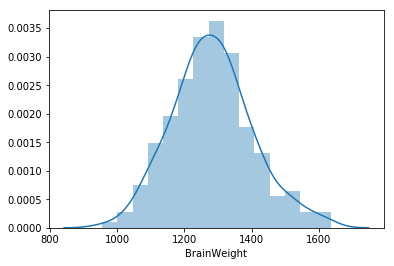

In [8]:
sns.distplot(data['BrainWeight'])
plt.show()

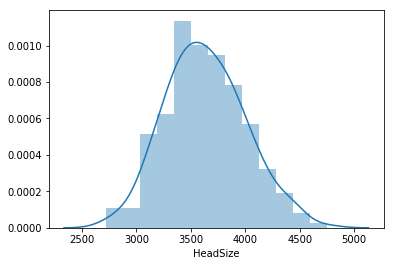

In [9]:
sns.distplot(data['HeadSize'])
plt.show()

# Bivariate Analysis

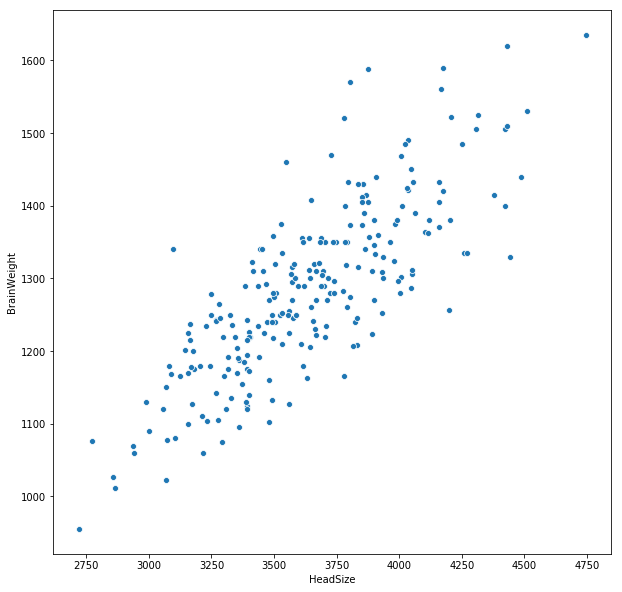

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='BrainWeight',x='HeadSize',data=data)
plt.show()

In [11]:
#which Age-range has highest BrainWeight
data.groupby(['AgeRange']).agg({'BrainWeight': 'mean'}).sort_values(by= 'BrainWeight', ascending = False).head()

,BrainWeight
AgeRange,
1,1304.736364
2,1263.937008


In [12]:
#which HeadSize has highest BrainWeight
data.groupby(['HeadSize']).agg({'BrainWeight': 'mean'}).sort_values(by= 'BrainWeight', ascending = False).head()

,BrainWeight
HeadSize,
4747,1635.0
4177,1590.0
4430,1565.0
4166,1560.0
4512,1530.0


# Heatmap

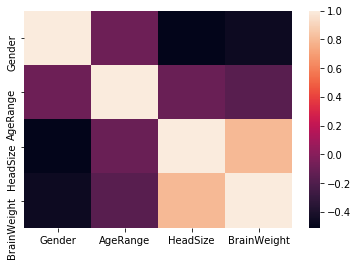

In [13]:
heat_map = sns.heatmap(data.corr())

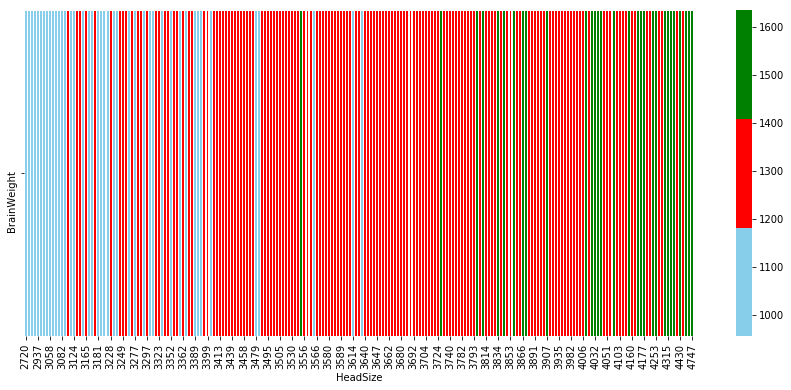

In [14]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(data,columns='HeadSize',values=["BrainWeight"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

# Removing outliers

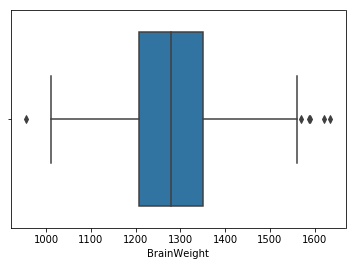

In [15]:
sns.boxplot(data['BrainWeight'])

In [16]:
#Inter quartile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender           1.0
AgeRange         1.0
HeadSize       487.0
BrainWeight    143.0
dtype: float64


In [17]:
from scipy import stats
z = np.abs(stats.zscore(data))
data1 = data[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

In [18]:
data1.shape

(236, 4)

# Modeling

In [19]:
X = data1['HeadSize'].values
Y = data1['BrainWeight'].values

In [20]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)

def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)

In [21]:
def r2_score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0
    ss_tot = 0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

slope =  0.2704641761203767
intercept =  299.88185394511686
R-squared : 0.5399091701578203


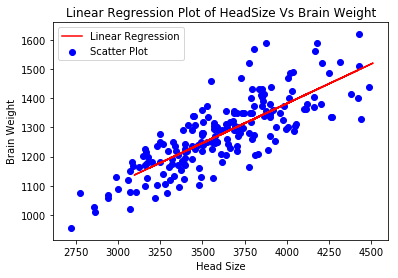

In [22]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2_score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

In [23]:
X=X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

import sklearn
from sklearn import metrics
r2_score = sklearn.metrics.r2_score(y_test, y_predictions)
print('r2_score = {}'.format(r2_score))

r2_score = 0.6478484092467913


In [24]:
import pickle
saved_model = pickle.dumps(Linear_Regression) 